In [49]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import plotly
import plotly.graph_objects as go
import plotly.express as px
import json
import statsmodels.api as sm
from scipy import stats
import statistics
from scipy.stats import shapiro
from statsmodels.stats import weightstats 
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
from scipy.stats import chi2_contingency
from scipy.stats import chi2
from scipy.stats import chisquare
import statsmodels.stats.multicomp as mc
import scikit_posthocs

In [50]:
import warnings
warnings.filterwarnings("ignore")

In [51]:
NuCloth=pd.Series([23,30,20,27,44,26,35,20,29,29,25,15,
                  18,27,19,22,12,26,34,15,27,35,26,43,35,
                  14,24,12,23,31,40,35,38,57,22,42,24,21,27,
                33])


In [52]:
dat=pd.DataFrame(NuCloth,columns=['size'])
dat.head()

,size
0,23
1,30
2,20
3,27
4,44


Q1. Compute the mean, median and the mode of the data

In [53]:
NuCloth.mean()

27.625

In [54]:
NuCloth.median()

26.5

In [55]:
NuCloth.mode()

0    27
1    35
dtype: int64

Q2. Compute the range , variance and standard deviation of the data 

In [56]:
Range=NuCloth.max()-NuCloth.min()
Range

45

In [57]:
NuCloth.var()

92.59935897435898

In [58]:
NuCloth.std()

9.622856071580774

Q3. Find the mean deviation for the data . The mean deviation is defined as below.

In [59]:
mad =NuCloth.mad(axis=0)
mad

7.4

Q4. Calculate the Pearson coefficient of skewness and comment on the skewness of the data

In [60]:
NuCloth_mean=NuCloth.mean()

In [61]:
NuCloth_med=NuCloth.median()

In [62]:
NuCloth_std=NuCloth.std()

In [63]:
s_kp=(3*(NuCloth_mean-NuCloth_med))/NuCloth_std

In [64]:
print(s_kp)

0.3507274737245009


Skewness tells us the direction of outliers.
While all other variable are Positively skewd.

In [65]:
df_num= dat.select_dtypes(include=np.number)

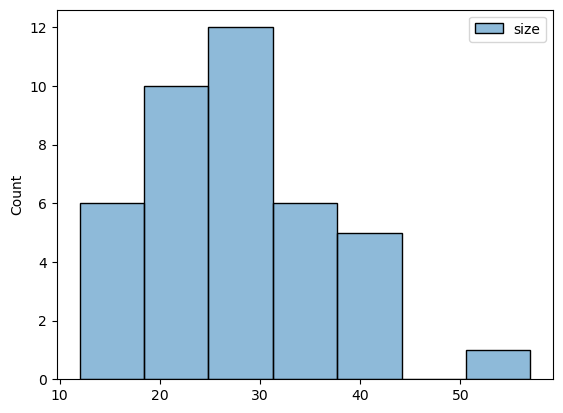

<Figure size 2000x2000 with 0 Axes>

In [66]:
sns.histplot(df_num)
plt.figure(figsize=(20,20))
plt.show()

Q5. Count the number of data values that fall within two standard deviations of the mean. Compare this with the answer from Chebyshev’s Theorem.

In [67]:
mean=dat.mean()

In [68]:
std=dat.std()

In [69]:
mean+2*std

size    46.870712
dtype: float64

In [70]:
quan=dat.quantile(0.95)
quan

size    43.05
Name: 0.95, dtype: float64

Both answer are close to each other.

Q6. Find the three quartiles and the interquartile range (IQR).

In [71]:
Q1=NuCloth.quantile(0.25)
Q2=NuCloth.quantile(0.50)
Q3=NuCloth.quantile(0.75)
IQR=Q3-Q1
print("Q1",Q1)
print("Q2",Q2)
print("IQR",IQR)


Q1 21.75
Q2 26.5
IQR 12.5


Q7. Are there any outliers in the data set ?

Yes

Q8. Draw a boxplot of the dataset to confirm .

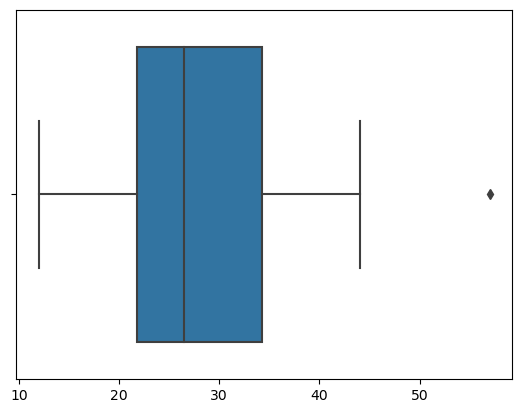

In [72]:
sns.boxplot(NuCloth)
plt.show()

There is only one outlier.

Q9. Find the percentile rank of the datapoint 25.


In [73]:
dat['Percentile Rank'] = dat['size'].rank()
dat

,size,Percentile Rank
0,23,13.5
1,30,27.0
2,20,8.5
3,27,22.5
4,44,39.0
5,26,19.0
6,35,32.5
7,20,8.5
8,29,25.5
9,29,25.5


In [74]:
#dat.drop(['prob'],axis=1,inplace=True)

Q10. What is the probability that a shirt cost is above 25 dollars?


In [75]:
num=len(dat[dat['size']>25])
den=len(dat['size'])
prob=num/den
print("The probability that a shirt cost is above 25 dollars:",prob)

The probability that a shirt cost is above 25 dollars: 0.575


Q11. Create a frequency distribution for the data and visualize it appropriately

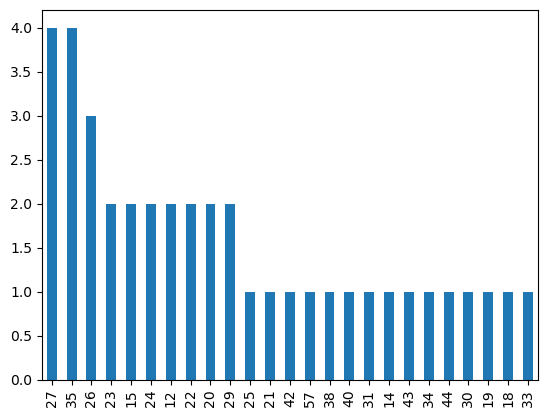

In [76]:
df=NuCloth.value_counts()#.reset_index().rename(columns={0:'frequency','index':'size'})
df.plot(kind='bar')
plt.show()

Q12. Create a probability distribution of the data and visualize it appropriately.

<AxesSubplot:xlabel='prob'>

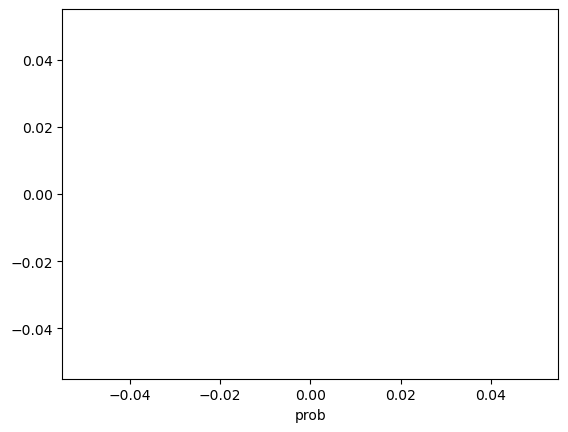

In [77]:
mu = np.mean(da1.size)
sig = da1.size.std()
da1['prob'] = 0.0

for idx,row in da1.iterrows():
    if row.size < mu:
        da1.at[idx,'prob'] = 1 - (stats.norm(mu,sig).pdf(row.size))
    else:
        da1.at[idx,'prob'] = stats.norm(mu, sig).pdf(row.size)
sns.distplot(da1['prob'])


In [78]:
da1

,price,Percentile Rank,prob
0,23,13.5,NaN
1,30,27.0,NaN
2,20,8.5,NaN
3,27,22.5,NaN
4,44,39.0,NaN
5,26,19.0,NaN
6,35,32.5,NaN
7,20,8.5,NaN
8,29,25.5,NaN
9,29,25.5,NaN


Q13. What is the shape of the distribution of this dataset? Create an appropriate graph to determine that. Take 100 random samples with replacement from this dataset of size 5 each. Create a sampling distribution of the mean shirt prices. Compare with other sampling distributions of sample size 10, 15, 20, 25, 30. State your observations. Does it corroborate the Central Limit Theorem?

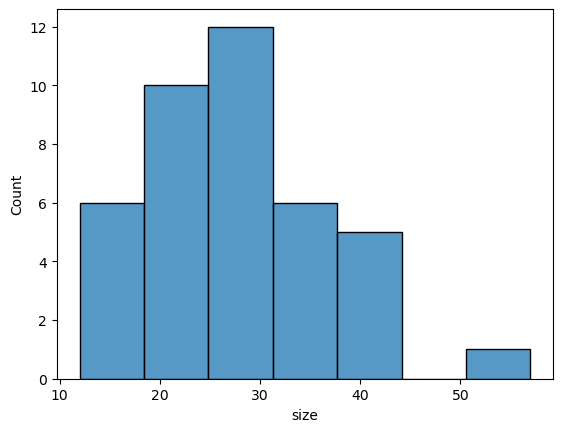

In [79]:
sns.histplot(dat['size'])
plt.show()

A distribution is said to be positively skewed when the tail on the right side of the histogram is longer than the 
left side. Most of the values tend to cluster toward the left side of the x-axis (i.e. the smaller values)
with increasingly fewer values at the right side of the x-axis (i.e. the larger values).



[24.8, 30.4, 26.4, 27.4, 27.8, 31.4, 27.8, 23.4, 27.6, 27.8, 23.2, 27.8, 32.6, 30.8, 28.0, 25.0, 30.8, 21.0, 27.6, 27.2, 28.4, 30.6, 21.0, 30.8, 24.6, 23.6, 30.4, 34.2, 24.6, 20.4, 26.0, 41.2, 21.6, 32.2, 28.4, 23.2, 20.4, 23.4, 25.0, 32.0, 21.2, 29.2, 25.6, 31.6, 15.2, 25.2, 25.6, 26.0, 30.6, 23.2, 28.2, 22.0, 24.8, 31.4, 26.6, 26.6, 20.4, 36.6, 31.2, 27.8, 30.0, 25.2, 23.4, 28.6, 29.4, 25.2, 26.4, 19.0, 31.4, 24.4, 29.8, 32.8, 29.2, 28.4, 27.2, 28.4, 28.4, 27.6, 24.0, 32.2, 26.6, 25.0, 26.2, 26.8, 34.2, 25.0, 26.4, 23.4, 33.4, 27.8, 24.4, 21.8, 25.0, 30.0, 19.0, 32.6, 25.0, 24.4, 25.4, 24.6]


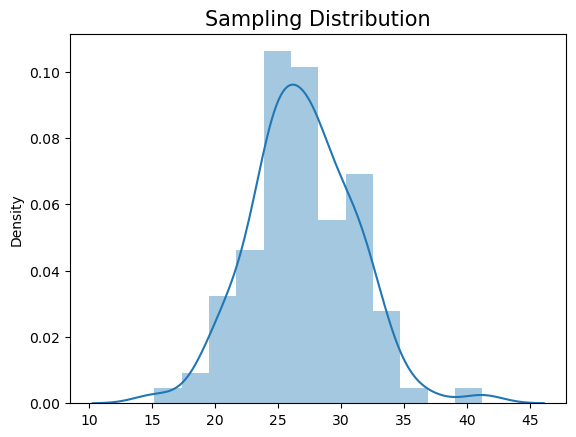

In [80]:
sample_size=5
n_samples=100
population_array=dat['size']
# create an empty list to store the means of each sample
sample_means = []
for i in range(n_samples):
    # generates a random sample of size 100 from the population array
    sample = np.random.choice(population_array, size=sample_size, replace=True)
    sample_mean = np.mean(sample)        # calculate the mean of the sample data
    sample_means.append(sample_mean)     # append the mean to the list
print(sample_means)   
sns.distplot(sample_means)
plt.title("Sampling Distribution", fontsize=15)
plt.show()

Q14. Treat this dataset as a binomial distribution where p is the probability that a shirt costs above 25 dollars. What is the probability that out of a random sample of 10 shirts 7 are costing more than 25 dollars?

In [81]:
data= dat[dat['size']>25]
data=len(data)/len(dat)
p=data
n=10
x=7
prob=stats.binom.pmf(x,n,p)
print('The probability that out of a random sample of 10 shirts 7 are costing more than 25 dollars is :',prob)


The probability that out of a random sample of 10 shirts 7 are costing more than 25 dollars is : 0.19143570809682064


Q15. NuCloth Claims that 60% of all shirts in their website cost less than 25 dollars . Using the Normal approximation of a Binomial distribution, find the probability that in a random sample of 10 shirts 7 of them will cost less than 25 dollars.
[ Note that the normal distribution can be used to approximate a binomial distribution if np>=5 and nq>=5 with the following correction for continuity
P(X=z) = P(z-0.5 < X < z+0.5 ) ]

In [82]:
p=0.6
n=10
x=7
prob= stats.binom.cdf(7,10,0.60)
print('find the probability that in a random sample of 10 shirts 7 of them will cost less than 25 dollars is:',prob)

find the probability that in a random sample of 10 shirts 7 of them will cost less than 25 dollars is: 0.8327102464


Q16. Compute a 95% Confidence Interval for the true price of a shirt in the NuCloth website using appropriate distribution.( State reasons as to why did you use a z or t distribution)

In [83]:
x_bar=np.mean(dat['size'])
n=len(dat['size'])
sig=np.std(dat['size'],ddof=1)
alpha=0.05

z_alpha_by_2 = stats.norm.isf(0.05/2)
print(z_alpha_by_2)
upper = x_bar + z_alpha_by_2 * sig / np.sqrt(n)
lower = x_bar - z_alpha_by_2 * sig / np.sqrt(n)
print('95% Confidence interval for true price of shirt is:', lower, upper)

1.9599639845400545
95% Confidence interval for true price of shirt is: 24.642900805126224 30.607099194873776


Q17. A data scientist wants to estimate with 95% confidence the true proportion of shirts having price greater than 25 dollars in the NuCloth website. A recent study showed that 60% of all shirts have a price greater than 25 dollars. The data scientist wants to be accurate within 2% of the true proportion. Find the minimum sample size necessary.

In [84]:
sigma =0.60
margin_of_error = 0.02
alpha = 0.05

z_alpha_by_2 = stats.norm.isf(0.05/2) 
# calculate sample size (n) 
n =(z_alpha_by_2*sigma/margin_of_error )**2
print('Required Sample Size:', round(n))

Required Sample Size: 3457


Q18. The same data scientist wants to estimate the true proportion of shirts having price greater than 25 dollars. She wants to be 90% confident and accurate within 5% of true proportion. Find the minimum sample size necessary.

In [85]:
df_1=dat.drop(['Percentile Rank'], axis=1)
df_1

,size
0,23
1,30
2,20
3,27
4,44
5,26
6,35
7,20
8,29
9,29


In [86]:
df_2=df_1[(df_1['size'])>25]
df_2

,size
1,30
3,27
4,44
5,26
6,35
8,29
9,29
13,27
17,26
18,34


In [87]:
sigma =0.6
print(sigma)
margin_of_error = 0.05
alpha = 0.1

z_alpha_2 = stats.norm.isf(0.1/2)
z_alpha_2
# calculate sample size (n)
n=(z_alpha_2 * sigma/margin_of_error)**2
n

0.6


389.5982573897397

Q19. NuCloth claims that currently 80% of all shirts have prices greater than 25 dollars . Test this claim with an alpha =0.05 if out of a random sample of 30 shirts only 23 are having prices above 25 dollars.

In [88]:
#H0:mu=80
#H1:mu<0.80
hypo_p=0.8
x=23
n=30
p_samp=x/n
z_stat=(p_samp-hypo_p)/np.sqrt((hypo_p*(1-hypo_p))/n)
p_val=stats.norm.sf(z_stat)
print('Test stat',z_stat)
print(p_val)

Test stat -0.45643546458763834
0.6759615659304269


As p_value >alpha(0.05) we fail to reject null hypothesis ,hence 80% of shirts have prices greater than 25.

As Zstat is > z_critical so we reject H0

Q20. A data scientist is researching the hypothesis that the average price of a shirt in NuCloth is higher than the supermarket. So he collects data from NuCloth and the supermarket that the average shirt price of shirts in NuCloth is 36 dollars vs 34 dollars in the supermarket. The standard deviations are 7.6 and 5.8 respectively.Suppose the data scientist got these values after randomly selecting 100 shirts from each place.


H0:mu_of_NuCloth-mu_of_supermarket<=0

H1:mu_of_NuCloth-mu_of_supermarket>0

a. What hypothesis would he use to compare the shirt prices of NuCloth vs
Supermarket


In [89]:
x1_bar=36
x2_bar=34
s1=7.6
s2=5.8
n1=100
n2=100
null_value=0
denominator = np.sqrt((s1**2 / n1) + (s2**2 / n2))
zscore = ((x1_bar - x2_bar) - (null_value)) / denominator
print('z-score:', zscore)

z-score: 2.09197696327652


b. What are critical values to be used?


In [90]:
z_critical = round(stats.norm.isf(0.05/2), 2)
z_critical

1.96

c. What statistical test will be used to compare these prices?


As Zstat is > z_critical so we reject H0


d. Complete the test and obtain the P-value.


In [91]:
p_val=stats.norm.sf(zscore)
p_val

0.018220288245112185

e. Summarize his conclusion based on the P-value.

As p_val < alpha(0.05) Hence we reject null Hypothesis so the claim of Data scientist that average price of Nucloth Shirt 
is more than Supermarket is correct.

## STATS MINI PROJECT

In [92]:
js=pd.read_json('modcloth_final_data.json',lines=True)
js.head()

,item_id,waist,size,quality,cup size,hips,bra size,category,bust,height,user_name,length,fit,user_id,shoe size,shoe width,review_summary,review_text
0,123373,29.0,7,5.0,d,38.0,34.0,new,36,5ft 6in,Emily,just right,small,991571,NaN,NaN,NaN,NaN
1,123373,31.0,13,3.0,b,30.0,36.0,new,NaN,5ft 2in,sydneybraden2001,just right,small,587883,NaN,NaN,NaN,NaN
2,123373,30.0,7,2.0,b,NaN,32.0,new,NaN,5ft 7in,Ugggh,slightly long,small,395665,9.0,NaN,NaN,NaN
3,123373,NaN,21,5.0,dd/e,NaN,NaN,new,NaN,NaN,alexmeyer626,just right,fit,875643,NaN,NaN,NaN,NaN
4,123373,NaN,18,5.0,b,NaN,36.0,new,NaN,5ft 2in,dberrones1,slightly long,small,944840,NaN,NaN,NaN,NaN


1. Read the datasets, Check the data types and Change the data types appropriately.

In [93]:
js.dtypes

item_id             int64
waist             float64
size                int64
quality           float64
cup size           object
hips              float64
bra size          float64
category           object
bust               object
height             object
user_name          object
length             object
fit                object
user_id             int64
shoe size         float64
shoe width         object
review_summary     object
review_text        object
dtype: object

In [94]:
js.shape

(82790, 18)

2. Change the height column datatype to float after converting the values as shown


In [95]:
js['height'] = js['height'].str.replace('\D+','.')

In [96]:
js['height'] = js['height'].str.rstrip('.')

In [97]:
js.head()

,item_id,waist,size,quality,cup size,hips,bra size,category,bust,height,user_name,length,fit,user_id,shoe size,shoe width,review_summary,review_text
0,123373,29.0,7,5.0,d,38.0,34.0,new,36,5.6,Emily,just right,small,991571,NaN,NaN,NaN,NaN
1,123373,31.0,13,3.0,b,30.0,36.0,new,NaN,5.2,sydneybraden2001,just right,small,587883,NaN,NaN,NaN,NaN
2,123373,30.0,7,2.0,b,NaN,32.0,new,NaN,5.7,Ugggh,slightly long,small,395665,9.0,NaN,NaN,NaN
3,123373,NaN,21,5.0,dd/e,NaN,NaN,new,NaN,NaN,alexmeyer626,just right,fit,875643,NaN,NaN,NaN,NaN
4,123373,NaN,18,5.0,b,NaN,36.0,new,NaN,5.2,dberrones1,slightly long,small,944840,NaN,NaN,NaN,NaN


In [98]:
js[['height']] = js[['height']].astype(float)

In [99]:
js[['quality']] = js[['quality']].astype(float)

In [100]:
js.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82790 entries, 0 to 82789
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   item_id         82790 non-null  int64  
 1   waist           2882 non-null   float64
 2   size            82790 non-null  int64  
 3   quality         82722 non-null  float64
 4   cup size        76535 non-null  object 
 5   hips            56064 non-null  float64
 6   bra size        76772 non-null  float64
 7   category        82790 non-null  object 
 8   bust            11854 non-null  object 
 9   height          81683 non-null  float64
 10  user_name       82790 non-null  object 
 11  length          82755 non-null  object 
 12  fit             82790 non-null  object 
 13  user_id         82790 non-null  int64  
 14  shoe size       27915 non-null  float64
 15  shoe width      18607 non-null  object 
 16  review_summary  76065 non-null  object 
 17  review_text     76065 non-null 

3. Rename the names of the columns which have space in between the column.
Ex: shoe size as shoe_size etc.

In [101]:
js=js.rename(columns = {'cup size':'cup_size','bra size':'bra_size','shoe size':'shoe_size','shoe width':'shoe_width'})
js.head()

,item_id,waist,size,quality,cup_size,hips,bra_size,category,bust,height,user_name,length,fit,user_id,shoe_size,shoe_width,review_summary,review_text
0,123373,29.0,7,5.0,d,38.0,34.0,new,36,5.6,Emily,just right,small,991571,NaN,NaN,NaN,NaN
1,123373,31.0,13,3.0,b,30.0,36.0,new,NaN,5.2,sydneybraden2001,just right,small,587883,NaN,NaN,NaN,NaN
2,123373,30.0,7,2.0,b,NaN,32.0,new,NaN,5.7,Ugggh,slightly long,small,395665,9.0,NaN,NaN,NaN
3,123373,NaN,21,5.0,dd/e,NaN,NaN,new,NaN,NaN,alexmeyer626,just right,fit,875643,NaN,NaN,NaN,NaN
4,123373,NaN,18,5.0,b,NaN,36.0,new,NaN,5.2,dberrones1,slightly long,small,944840,NaN,NaN,NaN,NaN


4. Check the missing values and Identify the distribution of the variables to impute the missing values. Explain based on your analysis decide the features which can be dropped and Which can be imputed. And also explain the reason to choose the metric that you have chosen to impute the null values.
Note: Kindly copy the datasets and work on the new data frame.


In [102]:
js.describe()

,item_id,waist,size,quality,hips,bra_size,height,user_id,shoe_size
count,82790.000000,2882.000000,82790.000000,82722.000000,56064.000000,76772.000000,81683.000000,82790.000000,27915.000000
mean,469325.229170,31.319223,12.661602,3.949058,40.358501,35.972125,5.456365,498849.564718,8.145818
std,213999.803314,5.302849,8.271952,0.992783,5.827166,3.224907,0.293081,286356.969459,1.336109
min,123373.000000,20.000000,0.000000,1.000000,30.000000,28.000000,3.000000,6.000000,5.000000
25%,314980.000000,28.000000,8.000000,3.000000,36.000000,34.000000,5.300000,252897.750000,7.000000
50%,454030.000000,30.000000,12.000000,4.000000,39.000000,36.000000,5.500000,497913.500000,8.000000
75%,658440.000000,34.000000,15.000000,5.000000,43.000000,38.000000,5.700000,744745.250000,9.000000
max,807722.000000,50.000000,38.000000,5.000000,60.000000,48.000000,7.700000,999972.000000,38.000000


In [103]:
js['quality'].median()

4.0

4.1 Check the count and percentage of missing values.


In [104]:
missing_values=js.isnull().sum()#[js.isnull().sum()>0]
missing_values

item_id               0
waist             79908
size                  0
quality              68
cup_size           6255
hips              26726
bra_size           6018
category              0
bust              70936
height             1107
user_name             0
length               35
fit                   0
user_id               0
shoe_size         54875
shoe_width        64183
review_summary     6725
review_text        6725
dtype: int64

In [105]:
len(missing_values)/len(js)*100

0.02174175625075492

4.2 check the Mean and Median.


In [106]:
print('MEAN:',js.mean())

MEAN: item_id      469325.229170
waist            31.319223
size             12.661602
quality           3.949058
hips             40.358501
bra_size         35.972125
height            5.456365
user_id      498849.564718
shoe_size         8.145818
dtype: float64


In [107]:
print('MEDIAN:',js.median())

MEDIAN: item_id      454030.0
waist            30.0
size             12.0
quality           4.0
hips             39.0
bra_size         36.0
height            5.5
user_id      497913.5
shoe_size         8.0
dtype: float64



4.3 Check the distribution of the variables using Histogram or Dist plot or KDE and boxplot etc.
Kindly explore at least two.


<Figure size 1500x700 with 0 Axes>

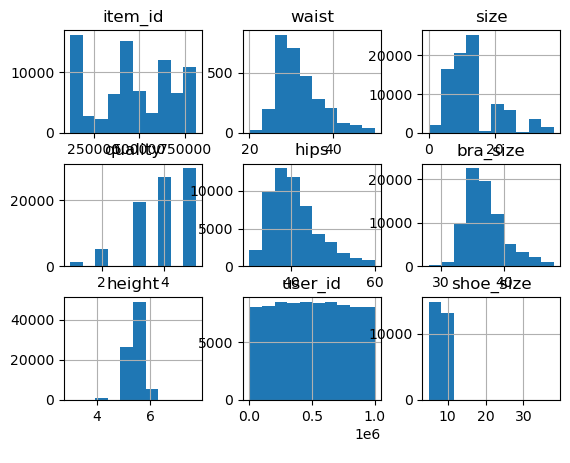

In [108]:
plt.figure(figsize=(15,7))
js.hist()
plt.xlabel(' ',fontsize=18)
plt.ylabel(' ',fontsize=18)
plt.show()

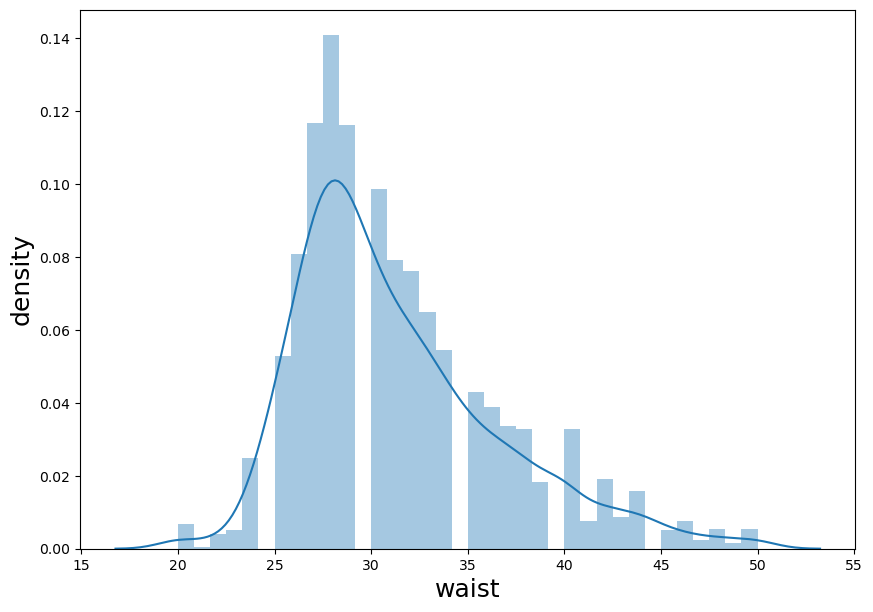

In [109]:
plt.figure(figsize=(10,7))
sns.distplot(js['waist'])
plt.xlabel('waist', fontsize=18)
plt.ylabel('density', fontsize=18)
plt.show()

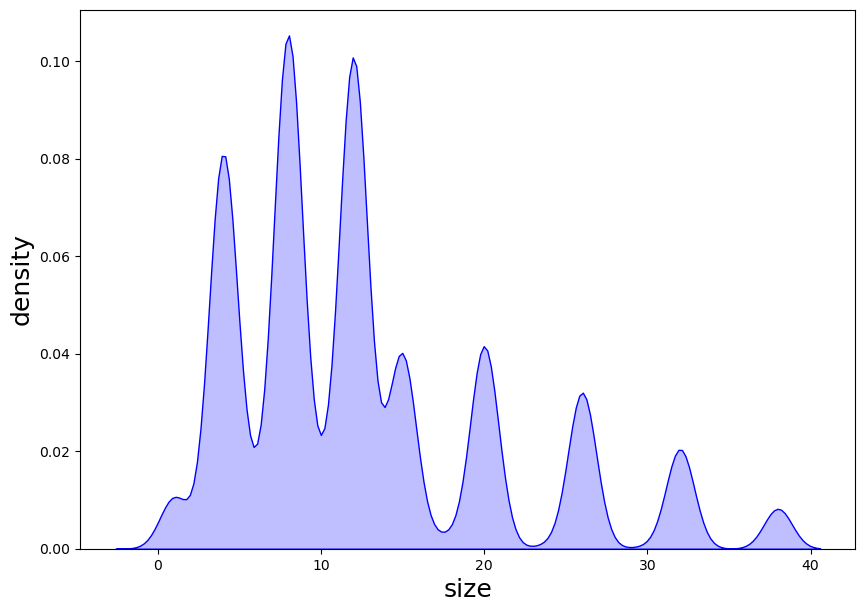

In [110]:
plt.figure(figsize=(10,7))
sns.kdeplot(js['size'],color='b', shade=True)
plt.xlabel('size', fontsize=18)
plt.ylabel('density', fontsize=18)
plt.show()

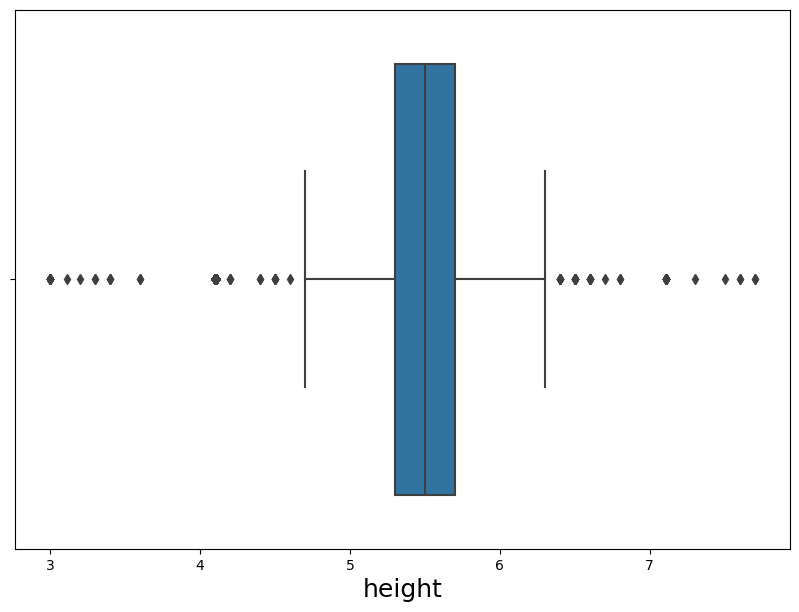

In [111]:
plt.figure(figsize=(10,7))
sns.boxplot('height',data=js)

plt.xlabel('height', fontsize=18)

plt.show()

In [112]:
js.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82790 entries, 0 to 82789
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   item_id         82790 non-null  int64  
 1   waist           2882 non-null   float64
 2   size            82790 non-null  int64  
 3   quality         82722 non-null  float64
 4   cup_size        76535 non-null  object 
 5   hips            56064 non-null  float64
 6   bra_size        76772 non-null  float64
 7   category        82790 non-null  object 
 8   bust            11854 non-null  object 
 9   height          81683 non-null  float64
 10  user_name       82790 non-null  object 
 11  length          82755 non-null  object 
 12  fit             82790 non-null  object 
 13  user_id         82790 non-null  int64  
 14  shoe_size       27915 non-null  float64
 15  shoe_width      18607 non-null  object 
 16  review_summary  76065 non-null  object 
 17  review_text     76065 non-null 

4.4 Check the Skewness and Kurtosis.
Explain what the Skewness and Kurtosis describe.


In [113]:
js.skew()

item_id     -0.120644
waist        0.993061
size         1.128301
quality     -0.676777
hips         0.969187
bra_size     0.901004
height      -1.095275
user_id      0.008201
shoe_size    0.436713
dtype: float64

In [114]:
js.kurt()

item_id     -1.215909
waist        0.836624
size         0.760010
quality     -0.167085
hips         0.848464
bra_size     1.039445
height       5.311308
user_id     -1.182436
shoe_size    8.448820
dtype: float64

4.5 Based on the above approach impute the missing values with the right metric. Or If you want to get some analysis before imputing missing values feel free to explore the analysis.

In [115]:
js['cup_size'].value_counts()

c         18370
d         16149
b         14628
dd/e      12557
ddd/f      6117
a          4791
dddd/g     2008
h          1042
aa          296
j           200
i           189
k           188
Name: cup_size, dtype: int64

In [116]:
js['cup_size'].replace(np.nan,'c',inplace=True)

As 'cup_size' is a categorical variable we replace the Nan_values by frequency

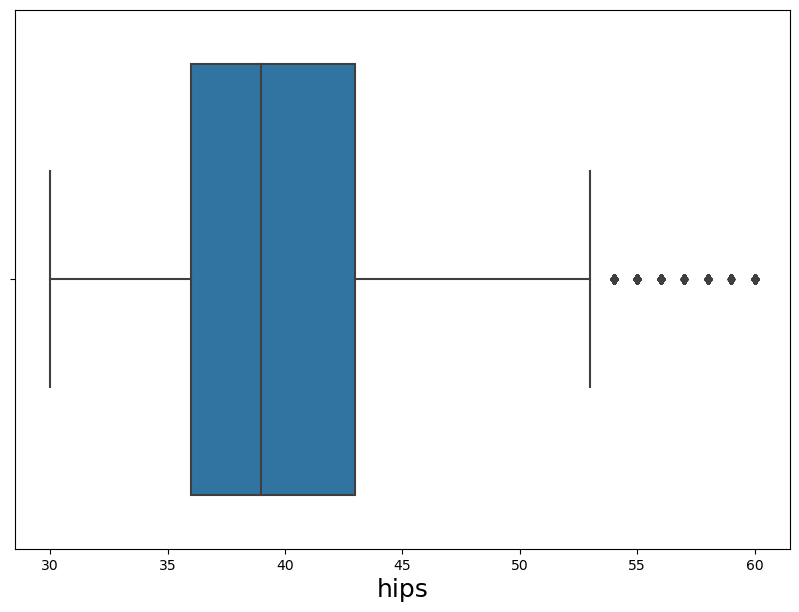

In [117]:
plt.figure(figsize=(10,7))
plt.xlabel('hips', fontsize=18)
sns.boxplot('hips',data=js)
plt.show()

In [118]:
med_hips=js['hips'].astype('float').median()
js['hips'].replace(np.nan,med_hips,inplace=True)

Replace the null values by median as outliers are present 

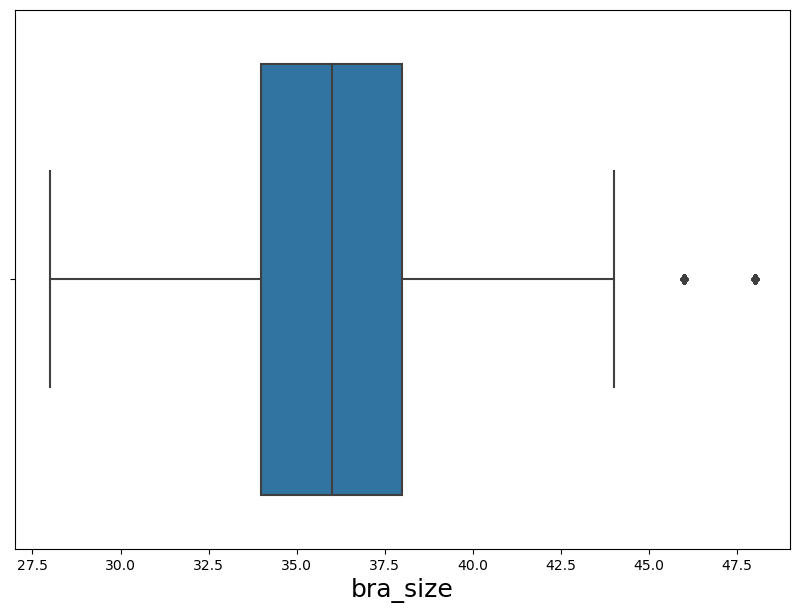

In [119]:
plt.figure(figsize=(10,7))
plt.xlabel('bra_size', fontsize=18)
sns.boxplot('bra_size',data=js)
plt.show()

In [120]:
med_br=js['bra_size'].astype('float').median()
js['bra_size'].replace(np.nan,med_br,inplace=True)

Replace the null values by median as outliers are present 

In [121]:
js['height'].value_counts()

5.40    11928
5.60    11891
5.50     9418
5.70     9161
5.30     8680
5.20     7684
5.80     6420
5.10     6286
5.90     4574
5.00     2252
5.11     1395
4.11      731
6.00      630
4.10      242
6.10      144
6.20       78
4.90       48
7.11       23
3.00       16
6.30       12
4.80       11
6.50       10
6.60        8
6.40        7
4.50        5
4.70        5
4.20        3
3.40        3
4.40        2
7.60        2
3.60        2
3.30        2
6.80        2
7.70        2
3.11        1
7.50        1
7.30        1
6.70        1
3.20        1
4.60        1
Name: height, dtype: int64

In [122]:
js['height'].replace(np.nan,'5.40',inplace=True)

In [123]:
js['review_summary'].value_counts()

Love it!                     185
I absolutely love this dr    124
Love it                       92
I really wanted to love t     92
I love this dress so much     84
                            ... 
Love it! Have it in two c      1
I would size up. A little      1
Wish it didn't pill under      1
Love this!! Such a great       1
I love this piece. I'm re      1
Name: review_summary, Length: 61713, dtype: int64

In [124]:
js['review_summary'].replace(np.nan,'Love it!',inplace=True)

In [125]:
js['review_summary'].value_counts()

Love it!                     6910
I absolutely love this dr     124
I really wanted to love t      92
Love it                        92
I love this dress so much      84
                             ... 
Cute! Good material.            1
Love it! Have it in two c       1
I would size up. A little       1
Wish it didn't pill under       1
I love this piece. I'm re       1
Name: review_summary, Length: 61713, dtype: int64

In [126]:
js['review_text'].value_counts()

Love it!                                                                                                                                                                                                                                                   153
Love it                                                                                                                                                                                                                                                     81
.                                                                                                                                                                                                                                                           76
Perfect!                                                                                                                                                                                                                                   

In [127]:
js['review_text'].replace(np.nan,'Love it!',inplace=True)

Replacing by frequency as height,review_summary,review_text is categorical variable.

js.drop(columns=['waist','bust','shoe_width','item_id','user_name','user_id'], axis=1,inplace=True)

if necessary drop the columns

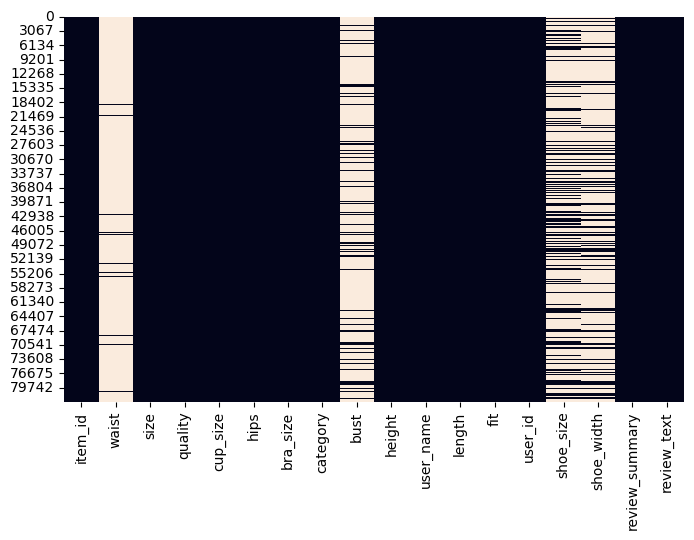

In [128]:
figure=plt.figure(figsize=(8,5))
sns.heatmap(js.isnull(),cbar= False)
plt.show()

In [129]:
js['shoe_width'].value_counts()

average    13097
wide        3958
narrow      1552
Name: shoe_width, dtype: int64

In [130]:
js['shoe_width'].replace(np.nan,'average',inplace=True)

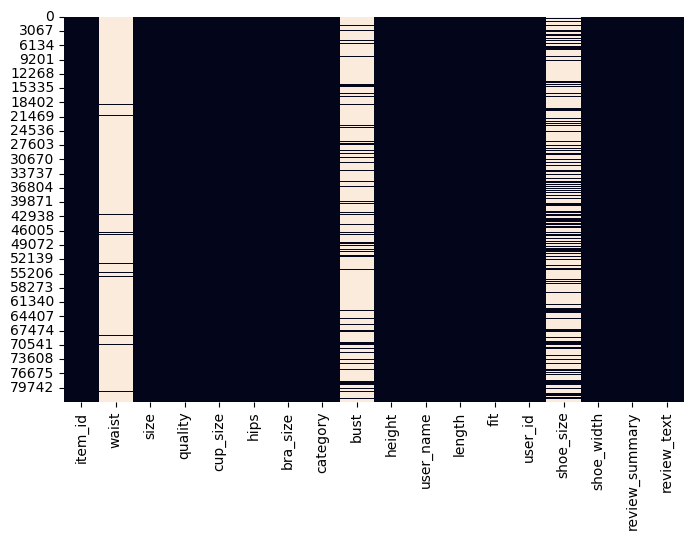

In [131]:
figure=plt.figure(figsize=(8,5))
sns.heatmap(js.isnull(),cbar= False)
plt.show()

No missing values present as the columns that are not required for analysis are dropped or replaced

5.Find the outliers which are below and above 2.5 * IQR - Q1 and 2.5 * IQR + Q3.

In [132]:
Q1=js.quantile(0.25)
Q3=js.quantile(0.75)
IQR =Q3-Q1
print("Lower:",2.5 * IQR - Q1)

print("High:",2.5 * IQR + Q3)

Lower: item_id      543670.0
waist           -13.0
size              9.5
quality           2.0
hips            -30.5
bra_size        -24.0
user_id      976721.0
shoe_size        -2.0
dtype: float64
High: item_id      1517090.0
waist             49.0
size              32.5
quality           10.0
hips              48.5
bra_size          48.0
user_id      1974364.0
shoe_size         14.0
dtype: float64


6.Check for the category dress review and visualize the top 10 reviews using any relevant plot. Identify the negative reviews if there are any.

In [133]:
js.head()

,item_id,waist,size,quality,cup_size,hips,bra_size,category,bust,height,user_name,length,fit,user_id,shoe_size,shoe_width,review_summary,review_text
0,123373,29.0,7,5.0,d,38.0,34.0,new,36,5.6,Emily,just right,small,991571,NaN,average,Love it!,Love it!
1,123373,31.0,13,3.0,b,30.0,36.0,new,NaN,5.2,sydneybraden2001,just right,small,587883,NaN,average,Love it!,Love it!
2,123373,30.0,7,2.0,b,39.0,32.0,new,NaN,5.7,Ugggh,slightly long,small,395665,9.0,average,Love it!,Love it!
3,123373,NaN,21,5.0,dd/e,39.0,36.0,new,NaN,5.40,alexmeyer626,just right,fit,875643,NaN,average,Love it!,Love it!
4,123373,NaN,18,5.0,b,39.0,36.0,new,NaN,5.2,dberrones1,slightly long,small,944840,NaN,average,Love it!,Love it!


In [134]:
#js['review_summary'] = js['review_summary'].replace(['Love it'], 'Love it!')

In [135]:
df_dress=js[js['category']=='dresses']['review_summary']
df_dress.value_counts().head(10)

I absolutely love this dr    104
I love this dress so much     70
I wanted to love this dre     48
I bought this dress for m     45
This dress is absolutely      43
Love it!                      41
I love love love this dre     40
Love this dress!              39
Love love love this dress     36
I really wanted to love t     32
Name: review_summary, dtype: int64

7. Find out the average shoe size for the different fits of the customer. Visualize using any relevant plot. Explain that, Is there any significant different shoe sizes for different fits?

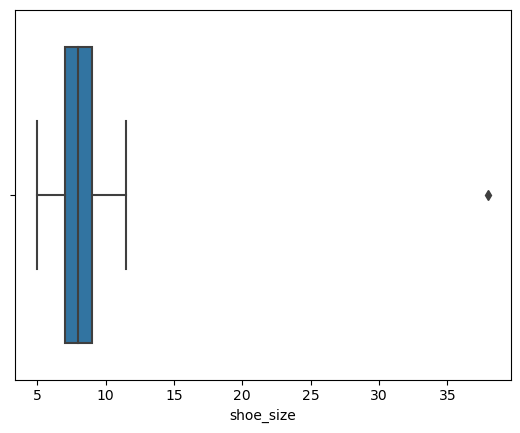

In [136]:
sns.boxplot('shoe_size',data=js)
plt.show()

<Figure size 1000x700 with 0 Axes>

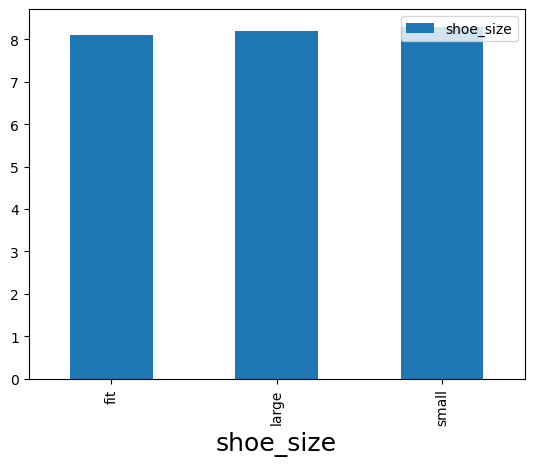

In [137]:
plt.figure(figsize=(10,7))
pd.pivot_table(data=js,index=['fit'],values=['shoe_size'],aggfunc=np.mean).plot(kind='bar')
plt.xlabel('shoe_size', fontsize=18)
plt.show()


8. Identify the customer’s common shoe width and average size for those who purchased the maximum quality. Is the mode of shoe width affect the user review?
Visualize using the appropriate plot.

In [138]:
js['shoe_width'].value_counts()

average    77280
wide        3958
narrow      1552
Name: shoe_width, dtype: int64

In [139]:
js['shoe_width'].replace(np.nan,'average',inplace=True)

In [140]:
js.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82790 entries, 0 to 82789
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   item_id         82790 non-null  int64  
 1   waist           2882 non-null   float64
 2   size            82790 non-null  int64  
 3   quality         82722 non-null  float64
 4   cup_size        82790 non-null  object 
 5   hips            82790 non-null  float64
 6   bra_size        82790 non-null  float64
 7   category        82790 non-null  object 
 8   bust            11854 non-null  object 
 9   height          82790 non-null  object 
 10  user_name       82790 non-null  object 
 11  length          82755 non-null  object 
 12  fit             82790 non-null  object 
 13  user_id         82790 non-null  int64  
 14  shoe_size       27915 non-null  float64
 15  shoe_width      82790 non-null  object 
 16  review_summary  82790 non-null  object 
 17  review_text     82790 non-null 

In [141]:
js[['quality']] = js[['quality']].astype(float)

In [142]:
js['quality'].max()

5.0

In [143]:
js.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82790 entries, 0 to 82789
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   item_id         82790 non-null  int64  
 1   waist           2882 non-null   float64
 2   size            82790 non-null  int64  
 3   quality         82722 non-null  float64
 4   cup_size        82790 non-null  object 
 5   hips            82790 non-null  float64
 6   bra_size        82790 non-null  float64
 7   category        82790 non-null  object 
 8   bust            11854 non-null  object 
 9   height          82790 non-null  object 
 10  user_name       82790 non-null  object 
 11  length          82755 non-null  object 
 12  fit             82790 non-null  object 
 13  user_id         82790 non-null  int64  
 14  shoe_size       27915 non-null  float64
 15  shoe_width      82790 non-null  object 
 16  review_summary  82790 non-null  object 
 17  review_text     82790 non-null 

In [144]:
df=pd.DataFrame(js[(js['shoe_width']=='average')& (js['quality']==5.0)])
df.head()

,item_id,waist,size,quality,cup_size,hips,bra_size,category,bust,height,user_name,length,fit,user_id,shoe_size,shoe_width,review_summary,review_text
0,123373,29.0,7,5.0,d,38.0,34.0,new,36,5.6,Emily,just right,small,991571,NaN,average,Love it!,Love it!
3,123373,NaN,21,5.0,dd/e,39.0,36.0,new,NaN,5.40,alexmeyer626,just right,fit,875643,NaN,average,Love it!,Love it!
4,123373,NaN,18,5.0,b,39.0,36.0,new,NaN,5.2,dberrones1,slightly long,small,944840,NaN,average,Love it!,Love it!
5,123373,27.0,11,5.0,c,41.0,36.0,new,NaN,5.4,Doreenajane,just right,small,162012,NaN,average,Love it!,Love it!
7,123373,NaN,11,5.0,d,42.0,38.0,new,NaN,5.5,brettloie,just right,small,58869,8.5,average,Love it!,Love it!


In [145]:
df['size'].mean()

12.362646930779277

In [146]:
df['shoe_width'].mode()

0    average
Name: shoe_width, dtype: object

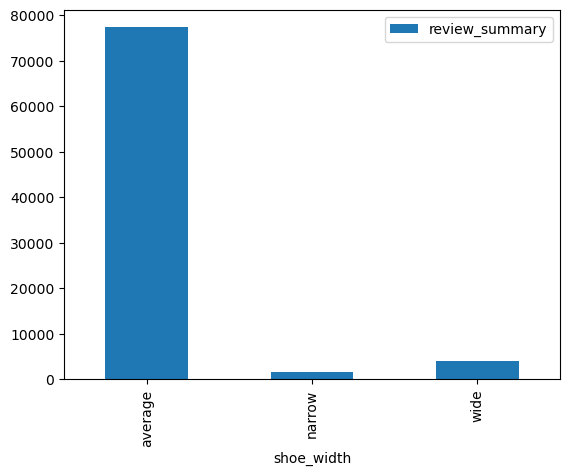

In [147]:
pd.pivot_table(js, values='review_summary', index=['shoe_width'],aggfunc='count').plot(kind='bar')
plt.show()

9. Extract the records belonging to the top 10 reviews, and then find the review summary for the different cup sizes. The basic analysis explains what you would try to infer. 
Try to use visualization.

In [150]:
len(js)

82790

In [151]:
a=js['review_summary'].value_counts().head(10).index

In [152]:
l=[]
for i in range(len(js)):
    if js.loc[i,'review_summary'] in a:
        l.append(i)

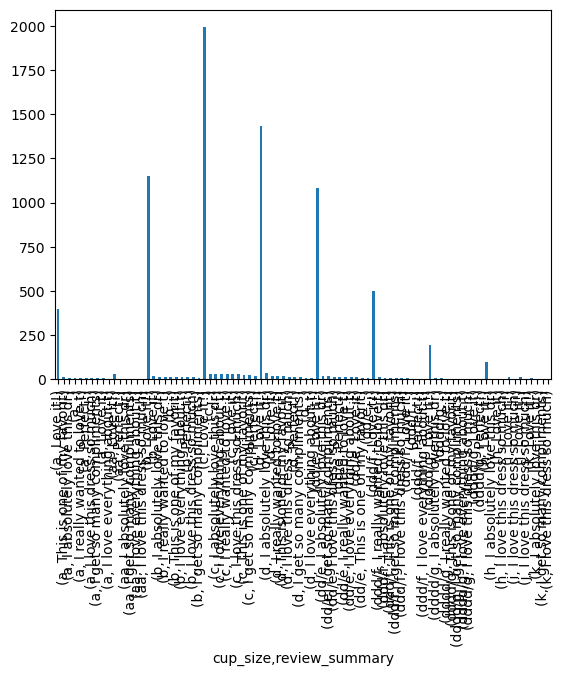

In [153]:
js.iloc[l].groupby(['cup_size'])['review_summary'].value_counts().plot(kind='bar')
plt.show()

In [157]:
js[['review_summary','cup_size']]
df=pd.DataFrame(js[['review_summary','cup_size']]).value_counts().reset_index().rename(columns={0:'count_n'})
df

,review_summary,cup_size,count_n
0,Love it!,c,1993
1,Love it!,d,1434
2,Love it!,b,1153
3,Love it!,dd/e,1080
4,Love it!,ddd/f,502
...,...,...,...
68573,"I normally wear a 2x, but",dd/e,1
68574,I normally wear a 3x and,c,1
68575,"I normally wear a 3x, but",dd/e,1
68576,I normally wear a 4P. Ord,a,1


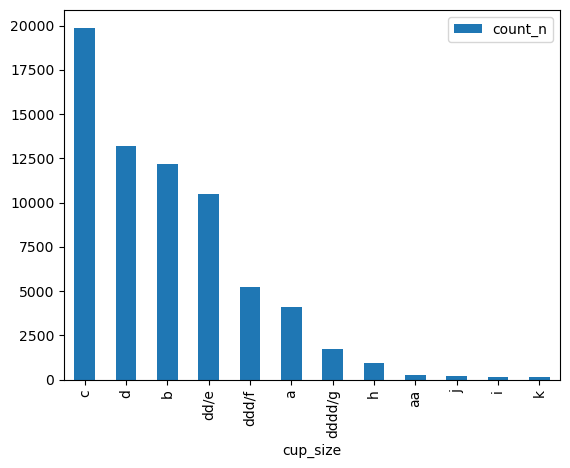

In [156]:
pd.pivot_table(df,index=['cup_size'],values=['count_n'],
               aggfunc='count').sort_values(by='count_n',ascending=False).plot(kind='bar')
plt.show()

10. Identify the most common review that we got from the customer whose hips size is greater than 35. Find out what kind of inference you can make.

In [158]:
hp=pd.DataFrame(js[(js.hips> 35)])
hp.head()

,item_id,waist,size,quality,cup_size,hips,bra_size,category,bust,height,user_name,length,fit,user_id,shoe_size,shoe_width,review_summary,review_text
0,123373,29.0,7,5.0,d,38.0,34.0,new,36,5.6,Emily,just right,small,991571,NaN,average,Love it!,Love it!
2,123373,30.0,7,2.0,b,39.0,32.0,new,NaN,5.7,Ugggh,slightly long,small,395665,9.0,average,Love it!,Love it!
3,123373,NaN,21,5.0,dd/e,39.0,36.0,new,NaN,5.40,alexmeyer626,just right,fit,875643,NaN,average,Love it!,Love it!
4,123373,NaN,18,5.0,b,39.0,36.0,new,NaN,5.2,dberrones1,slightly long,small,944840,NaN,average,Love it!,Love it!
5,123373,27.0,11,5.0,c,41.0,36.0,new,NaN,5.4,Doreenajane,just right,small,162012,NaN,average,Love it!,Love it!


In [159]:
hp[['review_summary']].value_counts().reset_index().head(10).rename(columns={0:'common_review'})

,review_summary,common_review
0,Love it!,5979
1,I absolutely love this dr,107
2,Love it,84
3,I really wanted to love t,81
4,I love this dress so much,76
5,.,70
6,This is one of my favorit,62
7,I get so many compliments,60
8,Perfect!,57
9,Love!,55


11. What is the relationship between height and waist? Describe what kind of relationship it has.

In [160]:
js.head()

,item_id,waist,size,quality,cup_size,hips,bra_size,category,bust,height,user_name,length,fit,user_id,shoe_size,shoe_width,review_summary,review_text
0,123373,29.0,7,5.0,d,38.0,34.0,new,36,5.6,Emily,just right,small,991571,NaN,average,Love it!,Love it!
1,123373,31.0,13,3.0,b,30.0,36.0,new,NaN,5.2,sydneybraden2001,just right,small,587883,NaN,average,Love it!,Love it!
2,123373,30.0,7,2.0,b,39.0,32.0,new,NaN,5.7,Ugggh,slightly long,small,395665,9.0,average,Love it!,Love it!
3,123373,NaN,21,5.0,dd/e,39.0,36.0,new,NaN,5.40,alexmeyer626,just right,fit,875643,NaN,average,Love it!,Love it!
4,123373,NaN,18,5.0,b,39.0,36.0,new,NaN,5.2,dberrones1,slightly long,small,944840,NaN,average,Love it!,Love it!


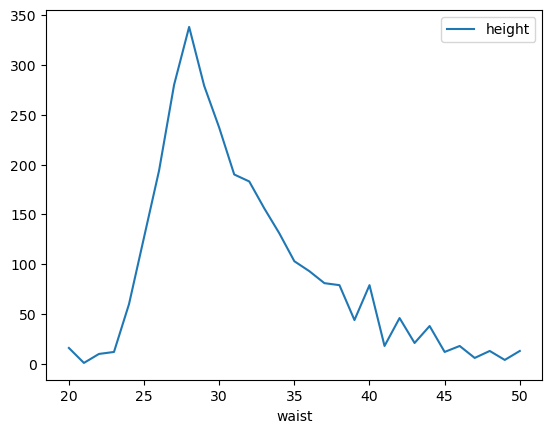

<Figure size 1500x1000 with 0 Axes>

In [161]:
pd.pivot_table(js,index=['waist'],values=['height'],aggfunc=('count')).plot(kind='line')
plt.figure(figsize=(15,10))
plt.show()

12. Plot the pair plot for the numerical plot. Explain according to your problem statement how the pair plot would help you.

In [ ]:
df_2=js.select_dtypes(include=np.number)
df_2.head()

In [ ]:
df_2.info()

In [ ]:
sns.pairplot(df_2,diag_kind='kde')

## Statistical Analysis:

1. Test the claim that the category feature and review summary have any relationship among them. The level of significance is 5%.

In [ ]:
table= pd.crosstab(js['review_summary'],js['category'])
table

In [ ]:
chi2_val = round(stats.chi2.isf(q = 0.05, df = 5), 4)

print('Critical value for chi-square test:', chi2_val)

In [ ]:
test_stat, p, dof, expected_value =chi2_contingency(observed=table,correction=False)

print("Test statistic:", test_stat)
print("p-value:", p)
print("Degrees of freedom:", dof)
print("Expected values:", expected_value)

2. Test statistically whether the size and hips have any relationship using 0.05 alpha. Before the above test, Test the normality test.

3. Does the quality significantly differ for any one shoe width? Test the test with 96%confidence intervals.

Check the normality of the data before the above test. Alpha = .05

𝐻0
 : The quality differ of all shoe_width are the same.

𝐻1
: The quality differ of all shoe_width is not same

In [ ]:
from scipy.stats import shapiro

stat, p_value = stats.shapiro(js['quality'])
print('p-value:', p_value)

In [ ]:
js['shoe_width'].unique()

In [ ]:
gr_A = js[js['shoe_width'] == 'average']['quality']
gr_B = js[js['shoe_width'] == 'wide']['quality']
gr_C = js[js['shoe_width'] == 'narrow']['quality']

In [ ]:
t = js['shoe_width'].nunique()
print('t:', t)
N = js['shoe_width'].value_counts().sum()
print('N:', N)

In [ ]:
f_test, p_val = stats.f_oneway(gr_A,gr_B,gr_C)

print('Test statistic:', f_test)
print('p-value:', p_val)

As P_val < alpha so we reject null hypothesis hence quality differ for one  shoe_width significantly

4. Check if the shoe width feature affects the review summary with a 99% confidence interval.

In [ ]:
table1= pd.crosstab(js['review_summary'],js['shoe_width'])
table1

In [ ]:
chi2_val = round(stats.chi2.isf(q = 0.05, df = 2), 4)
print('Critical value for chi-square test:', chi2_val)

In [ ]:
test_stat, p, dof, expected_value =chi2_contingency(observed=table1,correction=False)

print("Test statistic:", test_stat)
print("p-value:", p)
print("Degrees of freedom:", dof)
print("Expected values:", expected_value)

As P-Val is < alpha so we reject null hypothesis and shoe_width and reviw_summary are dependent variable

5. Check if the length feature affects the review summary with a 95% confidence interval.

In [ ]:
table2= pd.crosstab(js['review_summary'],js['length'])
table2

In [ ]:
test_stat, p, dof, expected_value =chi2_contingency(observed=table2,correction=False)

print("Test statistic:", test_stat)
print("p-value:", p)
print("Degrees of freedom:", dof)
print("Expected values:", expected_value)

 P_val < alpha so we reject null hypothesis hence length and review summary are dependent variables.

6. Does the average quality significantly differ for the different fits? Kindly test the relevant hypothesis test by having 0.05 alpha.
Check the normality of the data before the above test. Alpha = .05

In [ ]:
js['fit'].unique()

In [ ]:
gr_a = js[js['fit'] == 'small']['quality']
gr_b = js[js['fit'] == 'fit']['quality']
gr_c = js[js['fit'] == 'large']['quality']

In [ ]:
t = js['fit'].nunique()
print('t:', t)
N = js['fit'].value_counts().sum()
print('N:', N)

In [ ]:
f = round(stats.f.isf(q = 0.05, dfn = 2, dfd =82787 ), 4)
print('Critical value for F-test:', f)

In [ ]:
f_test, p_val = stats.f_oneway(gr_a,gr_b,gr_c)

print('Test statistic:', f_test)


As t_stat > critical value so we fail to reject null hypothesis hence average quality for different is same.